# Problem Statement & Data Description

   This file describes the contents of the heart-disease directory.

   This directory contains 1 database concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
   following location:

     1. Cleveland Clinic Foundation (cleveland.data)

   **Digital Citizens**


1. **Title**: Heart Disease Databases

2. **Source Information**:
   (a) Creators: 
       1. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:
             Robert Detrano, M.D., Ph.D.

3. **Relevant Information**:
     This database contains 76 attributes, but all published experiments
     refer to using a subset of 14 of them.  In particular, the Cleveland
     database is the only one that has been used by ML researchers to 
     this date. The "goal" field refers to the presence of heart disease
     in the patient.  It is integer valued from 0 (no presence) to 4.
     Experiments with the Cleveland database have concentrated on simply
     attempting to distinguish presence (values 1,2,3,4) from absence (value
     0).  
   
     The names and social security numbers of the patients were recently 
     removed from the database, replaced with dummy values.

     One file has been "processed", that one containing the Cleveland 
     database.
4. **Number of Instances:** 
        Database:    # of instances:
          Cleveland: 303

5. **Number of Features: 14 (including the predicted attribute)**

6. **Features' Information:**
    It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

 - **age**: The person's age in years
 - **sex**: The person's sex (1 = male, 0 = female)
 - **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
 - **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
 - **chol:** The person's cholesterol measurement in mg/dl
 - **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
 - **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
 - **thalach:** The person's maximum heart rate achieved
 - **exang:** Exercise induced angina (1 = yes; 0 = no)
 - **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
 - **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
 - **ca:** The number of major vessels (0-3)
 - **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
 - **target:** Heart disease (0 = no, 1 = yes)

To avoid [HARKing](https://journals.sagepub.com/doi/abs/10.1207/s15327957pspr0203_4) (or Hypothesizing After the Results are Known) I'm going to take a look at online guides on how heart disease is diagnosed, and look up some of the terms above.

**Diagnosis**: The diagnosis of heart disease is done on a combination of clinical signs and test results. The types of tests run will be chosen on the basis of what the physician thinks is going on [1](https://www.mayoclinic.org/diseases-conditions/heart-disease/diagnosis-treatment/drc-20353124), ranging from electrocardiograms and cardiac computerized tomography (CT) scans, to blood tests and exercise stress tests [2](https://www.heartfoundation.org.au/your-heart/living-with-heart-disease/medical-tests).

Looking at information of heart disease risk factors led me to the following: **high cholesterol, high blood pressure, diabetes, weight, family history, air pollution, and smoking** [3](https://www.bhf.org.uk/informationsupport/risk-factors). According to another source [4](https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack), the major factors that can't be changed are: **increasing age, male gender and heredity**. Note that **thalassemia**, one of the variables in this dataset, is heredity. Major factors that can be modified are: **Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes**. Other factors include **stress, alcohol and poor diet/nutrition**.

I can see no reference to the 'number of major vessels', but given that the definition of heart disease is **"...what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries"**, it seems logical the *more* major vessels is a good thing, and therefore will reduce the probability of heart disease.

Given the above, I would hypothesis that, if the model has some predictive ability, we'll see these factors standing out as the most important.

7. **Missing Attribute Values**: Distinguished with value -9.0. (Have to be treated)

8. **Class Distribution**:
        Database:      0   1   2   3   4 Total
          Cleveland: 164  55  36  35  13   303
          

# Data Preprocessing

In [1]:
import numpy as np # Linear Algebra
import pandas as pd # Dealing with DataFrames

import seaborn as sns # Advanced plotting 

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold

from sklearn import metrics

from sklearn.model_selection import train_test_split #for data splitting

# Importing modules for model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, \
VotingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

import sklearn.model_selection as ms

plt.style.use("ggplot")

## Loading the data from cleveland source

In [97]:
data_heart = pd.read_csv('./input/heart_cleveland.csv', error_bad_lines = True)

In [98]:
pd.set_option('display.max_columns', 500) # setting the max columns to 500
data_heart.head() # Seeing the top 5 observations of the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Are there any null values?
data_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# What the data is describing?
data_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Inferences
* **age feature** is close to normal distribution
* **cp feature** is close to normal distribution
* **trestbps feature** is close to normal distribution
* **chol feature** is close to normal distribution
* **thalach feature** is close to normal distribution

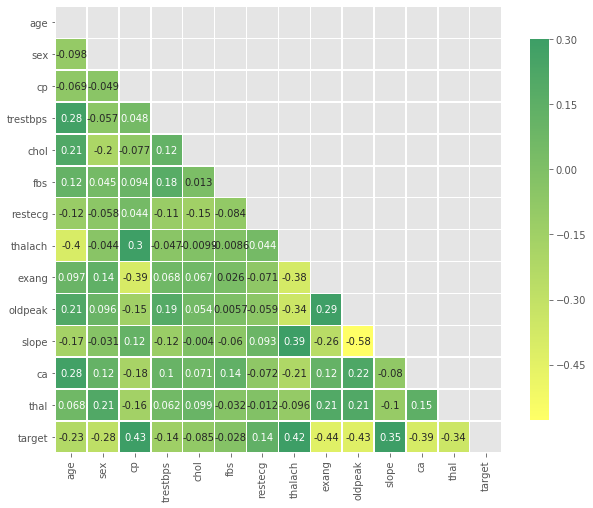

In [7]:
# Checking the correlation
# Generate a mask for the upper triangle
mask = np.zeros_like(data_heart.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(data = data_heart.corr(), annot = True,cmap='summer_r',vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7}, mask = mask)
plt.show()

## UNIVARIATE ANALYSIS

### Quantitative

Minimum age = 29
Maximum age = 77
Mode age = 58
% observations above age 40 = 94.71947194719472


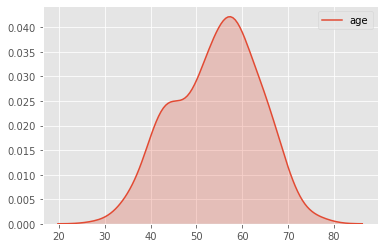

In [8]:
# Age
print("Minimum age =", data_heart.age.min())
print("Maximum age =", data_heart.age.max())
print("Mode age =", data_heart.age.mode()[0])
print("% observations above age 40 =", \
      ((data_heart.age >=40 ).sum()/ len(data_heart)) * 100 )

sns.kdeplot(data_heart.age, shade = True)
plt.show()

### Inferences
* **Age range is [29, 77]**
* **Approx 95% data has been collected of people with middle age, which is good.**

#### The following trestbps reference has been taken from 
https://www.disabled-world.com/calculators-charts/bloodpressurechart.php
* Age   Female  Male(High/Low)
* 25-29	120/80	121/80
* 30-35	122/81	123/82
* 36-39	123/82	124/83
* 40-45	124/83	125/83
* 46-49	126/84	127/84
* 50-55	129/85	128/85
* 56-59	130/86	131/87
* 60+	134/84	135/88

Range: [94, 200]
Mode is: 120
     trestbps  age  sex  target
72        130   29    1       1
65        138   35    0       1
1         130   37    1       1
163       138   38    1       1
164       138   38    1       1
154       138   39    0       1
44        140   39    1       1
24        140   40    1       1
283       152   40    1       0
2         130   41    0       1
116       130   41    1       1
63        135   41    1       1
149       130   42    1       1
280       136   42    1       0
22        140   42    1       1
100       148   42    1       1
98        130   43    1       1
215       132   43    0       0
251       132   43    1       0
18        150   43    1       1
21        130   44    1       1
32        130   44    1       1
46        140   44    1       1
67        130   45    0       1
107       138   45    0       1
255       142   45    1       0
119       138   46    0       1
285       140   46    1       0
35        142   46    0       1
196       

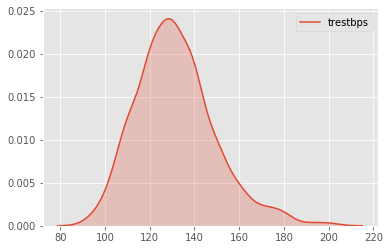

In [9]:
# Resting Blood Pressure (trestbps)
pd.set_option("display.max_rows", 500)
print("Range: [{}, {}]".format(data_heart.trestbps.min(), \
      data_heart.trestbps.max()))
print("Mode is:", data_heart.trestbps.mode()[0])

print((data_heart[data_heart.trestbps >= 130]\
      [["trestbps", 'age', 'sex', 'target']]).sort_values(by = ["age", "trestbps"]), end = "\n\n")

sns.kdeplot(data = data_heart.trestbps, shade = True)
plt.show()

## inferences
* **Data is showing good representation of the various factors taken into consideration with trestbps.**
* **Surprisingly, Person with trestbps 200 is not suffering from heart disease.**

**Cholesterol is a waxy substance found in your blood. Your body needs cholesterol to build healthy cells, but high levels of cholesterol can increase your risk of heart disease. With high cholesterol, you can develop fatty deposits in your blood vessels**

* **Total cholesterol levels less than 200 milligrams per deciliter (mg/dL) are considered desirable for adults. A reading between 200 and 239 mg/dL is considered borderline high and a reading of 240 mg/dL and above is considered high.**

Range: [126, 564]
Mode is: 197
# of people with good cholesterol level: 50


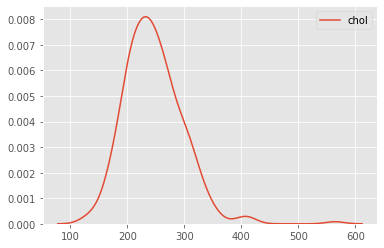

In [10]:
# Cholesterol
print("Range: [{}, {}]".format(data_heart.chol.min(), \
      data_heart.chol.max()))
print("Mode is:", data_heart.chol.mode()[0])
print("# of people with good cholesterol level:", len(data_heart\
                                                [data_heart.chol < 200]))
sns.kdeplot(data_heart.chol)
plt.show()

### Inferences
* Range: [126, 564]
* Mode is: 197
* **Number of people with good cholesterol level: 50**, which is very low.


Range: [71, 202]

Mode is: 162

# of people with thalach between [71,150):
0    89
1    43
Name: target, dtype: int64

Target of people with the max thalach  [1]

Target of people with the min thalach  [0]



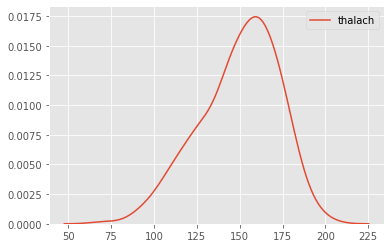

In [11]:
# thalach: Maximum heart rate achieved
print("Range: [{}, {}]".format(data_heart.thalach.min(), \
      data_heart.thalach.max()), end = "\n\n")
print("Mode is:", data_heart.thalach.mode()[0], end = "\n\n")

print("# of people with thalach between [{},150):\n{}".\
      format(data_heart.thalach.min(), data_heart[(data_heart.thalach >= \
      data_heart.thalach.min()) & (data_heart.thalach < 150)].\
      target.value_counts()), end = "\n\n")

print("Target of people with the max thalach ", \
      data_heart[data_heart.thalach == data_heart.thalach.max()]\
      ['target'].values, end = "\n\n")

print("Target of people with the min thalach ", \
      data_heart[data_heart.thalach == data_heart.thalach.min()]\
      ['target'].values, end = "\n\n")

sns.kdeplot(data_heart.thalach)
plt.show()

### Inference
* **thalach has reached till 202 for a middle aged person. Thus that person has a great possibility of having a heart disease.**
* **lowest thalach is 71 for a middle aged person. Thus that person has a great possibility of surviving a heart disease.**

* **ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.**
* **In unstable coronary artery disease, ST-segment depression is associated with a 100% increase in the occurrence of three-vessel/left main disease and to an increased risk of subsequent cardiac events. In these patients an early invasive strategy substantially decreases death/myocardial infarction.**
* **ST depression in ECG at entry indicates severe coronary lesions and large benefits of an early invasive treatment strategy in unstable coronary artery disease**

Range: [0.0, 6.2]

Mode is: 0.0

value count is:
 0.0    99
0.1     7
0.2    12
0.3     3
0.4     9
0.5     5
0.6    14
0.7     1
0.8    13
0.9     3
1.0    14
1.1     2
1.2    17
1.3     1
1.4    13
1.5     5
1.6    11
1.8    10
1.9     5
2.0     9
2.1     1
2.2     4
2.3     2
2.4     3
2.5     2
2.6     6
2.8     6
2.9     1
3.0     5
3.1     1
3.2     2
3.4     3
3.5     1
3.6     4
3.8     1
4.0     3
4.2     2
4.4     1
5.6     1
6.2     1
Name: oldpeak, dtype: int64



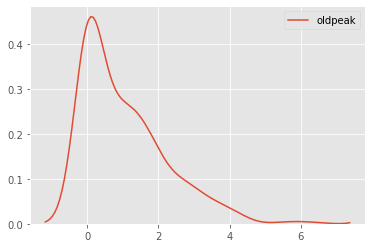

In [12]:
# oldpeak- ST depression induced by exercise relative to rest
print("Range: [{}, {}]".format(data_heart.oldpeak.min(), \
      data_heart.oldpeak.max()), end = "\n\n")
print("Mode is:", data_heart.oldpeak.mode()[0], end = "\n\n")

print("value count is:\n", data_heart.oldpeak.value_counts().sort_index(), end = "\n\n")

sns.kdeplot(data_heart.oldpeak)
plt.show()

### Inferences
* **Approx 1/3 rd of the people have no effect on ST segment depression induced by exercise relative to rest. Remaining all that is 66% of the people are havin ST segment abnormally low below the baseline, thus increasing the chances of heart disease.**

* What happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries", it seems logical the more major vessels is a good thing, and therefore will reduce the probability of heart disease.
* **The Coronary Arteries are the blood vessels that supply blood to your heart. They branch off of the aorta at its base. The right coronary artery, the left main coronary, the left anterior descending, and the left circumflex artery, are the four major coronary arteries.**

Range: [0, 4]

Mode is: 0

value count is:
 0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64



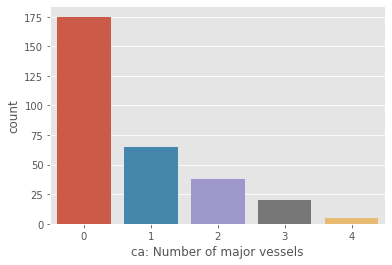

In [13]:
# ca: Number of major vessels
print("Range: [{}, {}]".format(data_heart.ca.min(), \
      data_heart.ca.max()), end = "\n\n")
print("Mode is:", data_heart.ca.mode()[0], end = "\n\n")

print("value count is:\n", data_heart.ca.value_counts(), \
      end = "\n\n")

sns.countplot(data_heart.ca)
plt.xlabel("ca: Number of major vessels")
plt.show()

## Inferences
* **Approx 60% of the people in the sample taken han 0 number of major vessels. Thus, increasing the risk of heart disease**

## Qualitative data

Mode is: 1

value count is:
 1    165
0    138
Name: target, dtype: int64



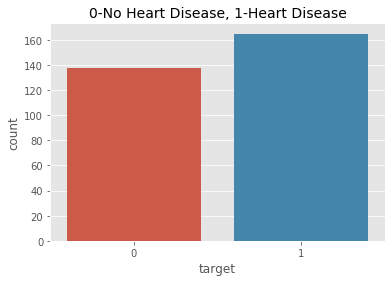

In [14]:
# target: 0-No Heart Disease, 1-Heart Disease
print("Mode is:", data_heart.target.mode()[0], end = "\n\n")

print("value count is:\n", data_heart.target.value_counts(), \
      end = "\n\n")

sns.countplot(data_heart.target)
plt.title("0-No Heart Disease, 1-Heart Disease", fontsize = 14)
plt.show()

## Our class seems balanced with not a major difference between targets.

Mode is: 1

value count is:
 0     96
1    207
Name: sex, dtype: int64



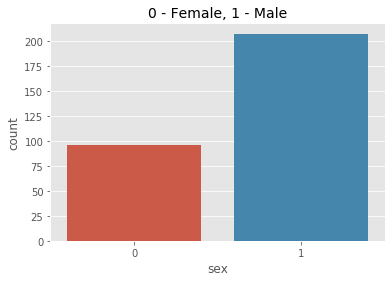

In [15]:
# sex: 0-Female, 1-Male
print("Mode is:", data_heart.sex.mode()[0], end = "\n\n")

print("value count is:\n", data_heart.sex.value_counts().sort_index(), \
      end = "\n\n")

sns.countplot(x = "sex", data = data_heart)
plt.title("0 - Female, 1 - Male", fontsize = 14)
plt.show()

## inferences
* **The Number of Males are more than two times the number of females in the sample taken**

Mode is: 0

value count is:
 0    143
1     50
2     87
3     23
Name: cp, dtype: int64



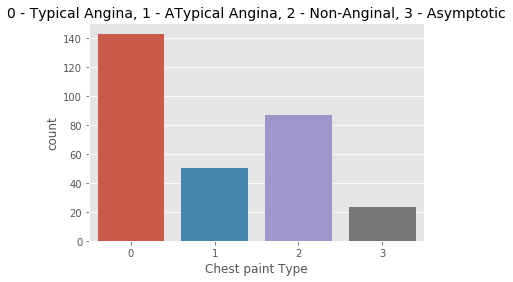

In [16]:
#cp: Chest paint Type: 0 - Typical Angina, 1 - ATypical Angina,
# 2 - Non-Anginal, 3 - Asymptotic

print("Mode is:", data_heart.cp.mode()[0], end = "\n\n")

print("value count is:\n", data_heart.cp.value_counts().sort_index(), \
      end = "\n\n")

sns.countplot(x = "cp", data = data_heart)
plt.title("0 - Typical Angina, 1 - ATypical Angina, \
2 - Non-Anginal, 3 - Asymptotic",fontsize=14)
plt.xlabel("Chest paint Type")
plt.show()

## Inferences
* **More people in the sample takean are suffering from cp type 0, i.e. Typical Angina**

* **A fasting blood sugar level less than 100 mg/dL (5.6 mmol/L) is normal. A fasting blood sugar level from 100 to 125 mg/dL (5.6 to 6.9 mmol/L) is considered prediabetes. If it's 126 mg/dL (7 mmol/L) or higher on two separate tests, you have diabetes**
* **A fasting blood sugar level, or fasting glucose level, is the result of a blood sample taken after a patient fasts for at least eight hours.**

Mode is: 0

value count is:
 0    258
1     45
Name: fbs, dtype: int64



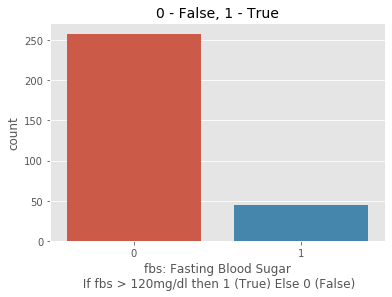

In [17]:
#fbs: Fasting Blood Sugar: If > 120mg/dl then 1 (True) else it is False
# That is for True, the risk of heart disease is very high

print("Mode is:", data_heart.fbs.mode()[0], end = "\n\n")

print("value count is:\n", data_heart.fbs.value_counts(), \
      end = "\n\n")

sns.countplot(data_heart.fbs)
plt.title("0 - False, 1 - True",fontsize=14)
plt.xlabel("fbs: Fasting Blood Sugar\n If fbs > 120mg/dl then 1 (True) Else 0 (False)")
plt.show()

## Inference(s)
* **Surprisingly, There is humongous difference between people with fbs < 120mg/dl being on the higher side, which contradicts the the fact that People with Target as 1 i.e. Heart Diseased are more.**

* **Left ventricular hypertrophy is enlargement and thickening (hypertrophy) of the walls of your heart's main pumping chamber (left ventricle). Left ventricular hypertrophy can develop in response to some factor — such as high blood pressure or a heart condition — that causes the left ventricle to work harder**

Mode is: 1

value count is:
 0    147
1    152
2      4
Name: restecg, dtype: int64



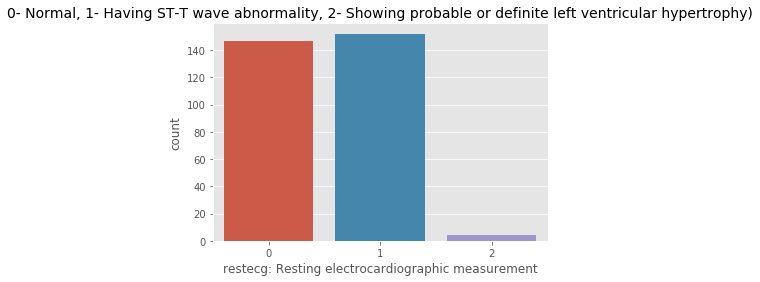

In [18]:
# restecg: Resting electrocardiographic measurement (0- normal, 
#1- having ST-T wave abnormality, 2- showing probable or definite left ventricular hypertrophy)

print("Mode is:", data_heart.restecg.mode()[0], end = "\n\n")

print("value count is:\n", data_heart.restecg.value_counts().sort_index(), \
      end = "\n\n")

sns.countplot(data_heart.restecg)
plt.title("0- Normal, 1- Having ST-T wave abnormality, 2- Showing probable or definite \
left ventricular hypertrophy)",fontsize=14)
plt.xlabel("restecg: Resting electrocardiographic measurement")
plt.show()

## Inference(s)
* **There are 4 people with restecg type 2 i.e these people have a very high chance of suffering from heart disease**
* **Approx 50% of the sample observations have normal ecg's**

* **Stable angina is usually triggered by physical exertion. When you climb stairs, exercise or walk, your heart demands more blood, but it's harder for the muscle to get enough blood when your arteries are narrowed.**

Mode is: 0

value count is:
 0    204
1     99
Name: exang, dtype: int64



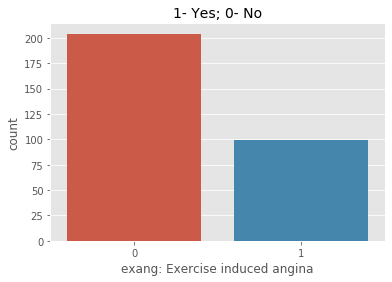

In [19]:
# exang: Exercise induced angina (1- yes; 0- no)

print("Mode is:", data_heart.exang.mode()[0], end = "\n\n")

print("value count is:\n", data_heart.exang.value_counts(), \
      end = "\n\n")

sns.countplot(data_heart.exang)
plt.title("1- Yes; 0- No",fontsize=14)
plt.xlabel("exang: Exercise induced angina")
plt.show()

## Inference(s)
* **33% of the people in the sample have exang 1**

* **low upsloping ST depression does not signify more severe ischemia, more extensive CAD, or more stress-induced backward left ventricular failure. Thus, it would be reasonable to consider patients with slow upsloping ST depression during exercise as having a very low likelihood of CAD, similar to patients with rapid upsloping ST depression. (CAD:  coronary artery disease)**


Mode is: 2

value count is:
 2    142
1    140
0     21
Name: slope, dtype: int64



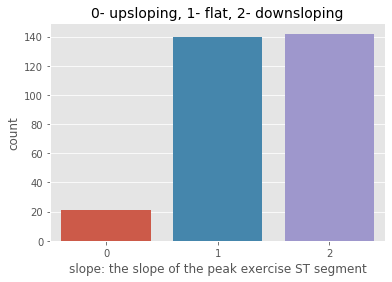

In [20]:
# slope: the slope of the peak exercise ST segment (0- upsloping, 
# 1- flat, 2- downsloping)

print("Mode is:", data_heart.slope.mode()[0], end = "\n\n")

print("value count is:\n", data_heart.slope.value_counts(), \
      end = "\n\n")

sns.countplot(data_heart.slope)
plt.title("0- upsloping, 1- flat, 2- downsloping",fontsize=14)
plt.xlabel("slope: the slope of the peak exercise ST segment")
plt.show()

## Inference(s)
* **Approx 50% of the people in the sample have flat slope, i.e. They don't exercise**

### BIVARIATE ANALYSIS

In [21]:
pd.crosstab(data_heart['sex'], data_heart['target'])

target,0,1
sex,,
0,24,72
1,114,93


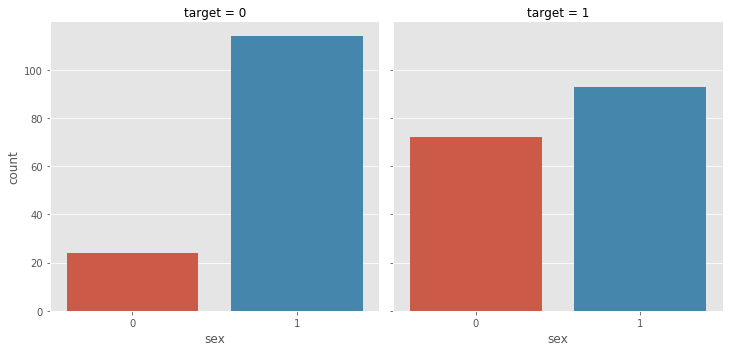

In [22]:
sns.catplot(x='sex', col='target', kind='count', data=data_heart);


In [23]:
print("% of women suffering from heart disease: " , data_heart.loc[data_heart.sex == 0].target.sum()/data_heart.loc[data_heart.sex == 0].target.count())
print("% of men suffering from heart disease:   " , data_heart.loc[data_heart.sex == 1].target.sum()/data_heart.loc[data_heart.sex == 1].target.count())

% of women suffering from heart disease:  0.75
% of men suffering from heart disease:    0.4492753623188406


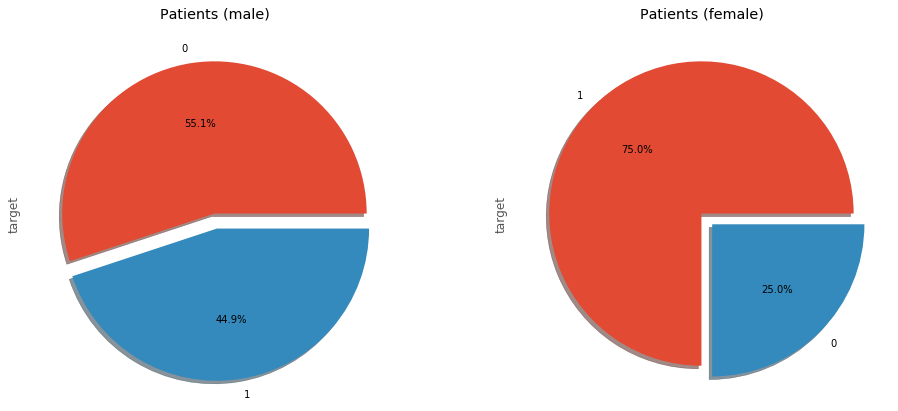

In [24]:
f,ax=plt.subplots(1,2,figsize=(16,7))

data_heart.loc[data_heart['sex']==1, 'target'].value_counts().plot.pie(explode=[0,0.10],autopct='%1.1f%%',ax=ax[0],shadow=True)
data_heart.loc[data_heart['sex']==0, 'target'].value_counts().plot.pie(explode=[0,0.10],autopct='%1.1f%%',ax=ax[1],shadow=True)

ax[0].set_title('Patients (male)')
ax[1].set_title('Patients (female)')

plt.show()


**Percentage of Females is more in this dataset who have a heart disease**

In [25]:
data_heart.groupby(by=['cp', 'target'])['target'].count()

cp  target
0   0         104
    1          39
1   0           9
    1          41
2   0          18
    1          69
3   0           7
    1          16
Name: target, dtype: int64

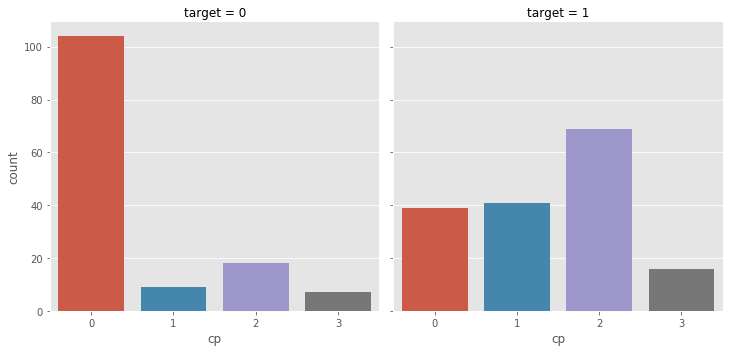

In [26]:
sns.catplot(x='cp', col='target', kind='count', data=data_heart)

**Patients who had chest pain type 2 is more in the category of people with disease.  Also, chest pain type 0 is not that serious as there are many people (~110) who had chest pain type 0 without heart disease.**

##  Let's see the fbs feature now, fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

In [27]:
pd.crosstab(data_heart['fbs'], data_heart['target'])


target,0,1
fbs,,
0,116,142
1,22,23


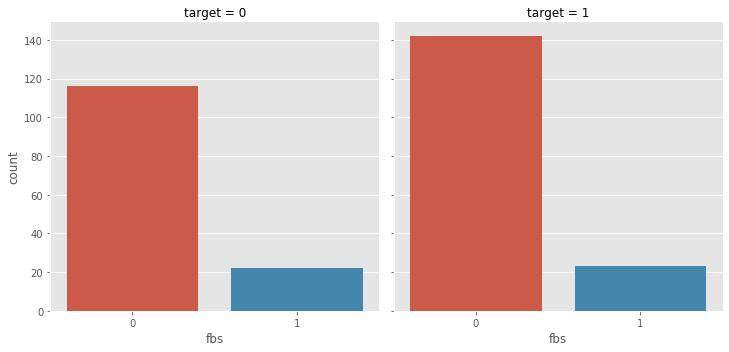

In [28]:
sns.catplot(x='fbs', col='target', kind='count', data=data_heart);

**Number of people if blood sugar is almost similar in both categories. fbs won't be a good indicator always for determining heart disease from this dataset.**

# Let's now see restecg feature

resting electrocardiographic results

-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

In [29]:
data_heart.groupby(by=['restecg', 'target'])['target'].count()

restecg  target
0        0         79
         1         68
1        0         56
         1         96
2        0          3
         1          1
Name: target, dtype: int64

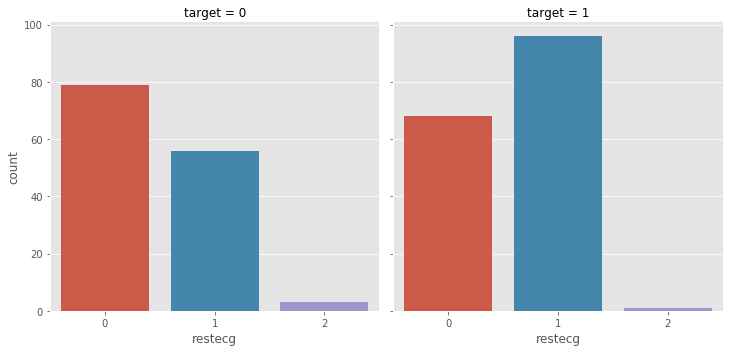

In [30]:
sns.catplot(x='restecg',col= 'target', kind='count', data = data_heart)

**The number of people having ST-T wave abnormality is more in the category with heart diesase.**

# Let's check the exang feature
# exercise induced angina (1 = yes; 0 = no)

In [31]:
pd.crosstab(data_heart['exang'], data_heart['target'])

target,0,1
exang,,
0,62,142
1,76,23


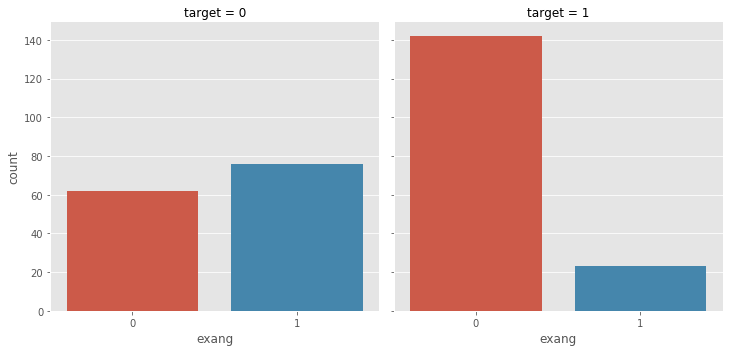

In [32]:
sns.catplot(x='exang', col ='target', kind='count', data=data_heart)

**People without exercise include angina is more in category with disease**

# Let's see what info does slope feature have to give.

Slope: the slope of the peak exercise ST segment

-->  Value 1: upsloping

-->  Value 2: flat

-- > Value 3: downsloping

In [33]:
data_heart.groupby(by=['slope', 'target'])['target'].count()

slope  target
0      0          12
       1           9
1      0          91
       1          49
2      0          35
       1         107
Name: target, dtype: int64

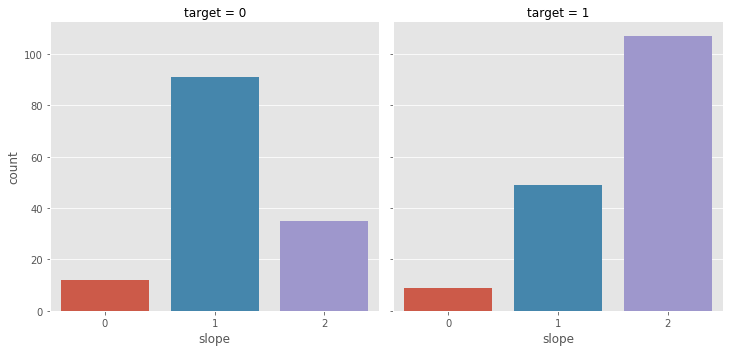

In [34]:
sns.catplot(x='slope', col='target', kind='count', data=data_heart)

**Numer of people with downsloping is more (~105) in the category with diesease.**

# Let's check the feature ca now.

# ca: number of major vessels (0-3) colored by flourosopy

In [35]:
data_heart.groupby(by=['ca', 'target'])['target'].count()

ca  target
0   0          45
    1         130
1   0          44
    1          21
2   0          31
    1           7
3   0          17
    1           3
4   0           1
    1           4
Name: target, dtype: int64

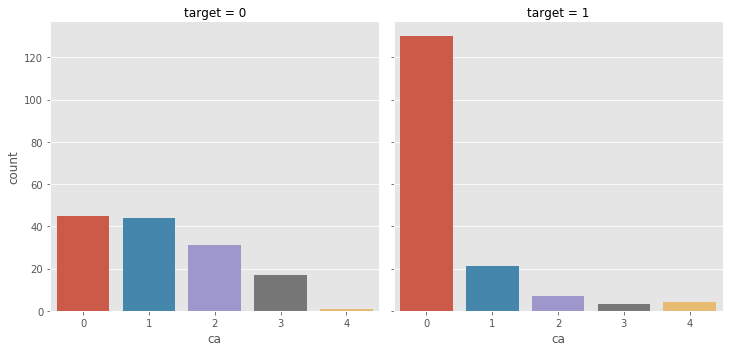

In [36]:
sns.catplot(x='ca', col='target',kind= 'count', data=data_heart)

**Most of the people with heart disease have ca as 0.**

# Let's see what story is feature thal telling.

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [37]:
data_heart.groupby(by=['thal', 'target'])['target'].count()

thal  target
0     0           1
      1           1
1     0          12
      1           6
2     0          36
      1         130
3     0          89
      1          28
Name: target, dtype: int64

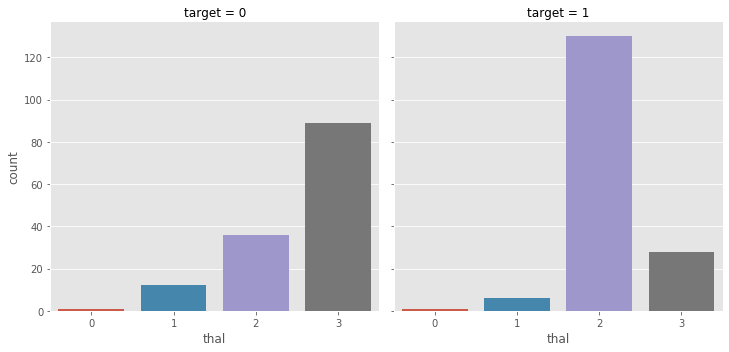

In [38]:
sns.catplot(x='thal', col='target', kind='count', data=data_heart)

**Most of the people with heart disease have thal as 2.**

# Continous Features

# Exploring the continous features.

1. age
2. trestbps
3. thalach
4. chol

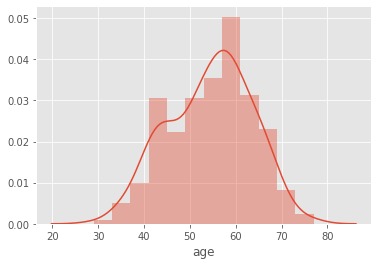

In [39]:
sns.distplot(data_heart['age'])

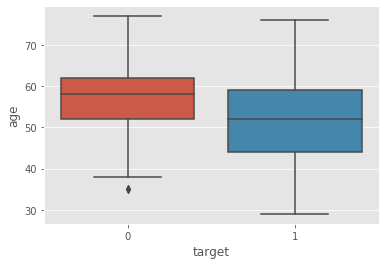

In [40]:
sns.boxplot(x=data_heart['target'], y=data_heart['age']);

**Median age of people with disease is less than that of without disease. Age itself can't be a 
  descriptor  to predict disease.**

# Let's see how trestbps is distributed

trestbps: resting blood pressure (in mm Hg on admission to the hospital)



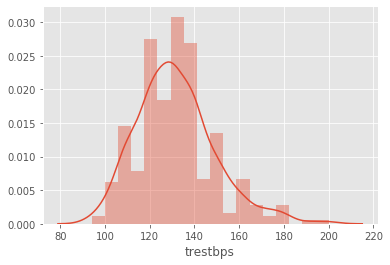

In [41]:
sns.distplot(data_heart['trestbps'])

**We can see some outliers from the histogram, let's check in which category do these outliers belongs to**

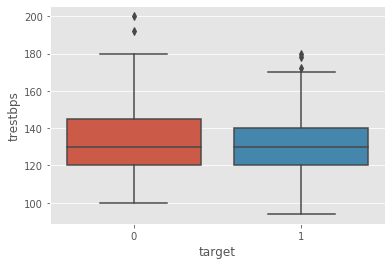

In [42]:
sns.boxplot(x=data_heart['target'], y=data_heart['trestbps'])

**Outliers that are around 200 are in actegory that don't have heart disease. Also, median trestbps is also equal in both cases.**

# Let's check thalach feature.

thalach: maximum heart rate achieved

Heart rate can be as a good indicator for a heart disease. Let's check what our data have to tell.

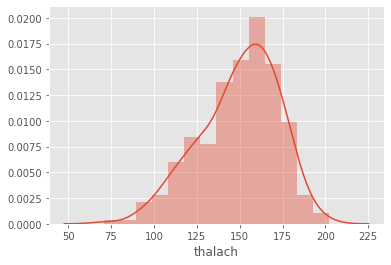

In [43]:
sns.distplot(data_heart['thalach'])

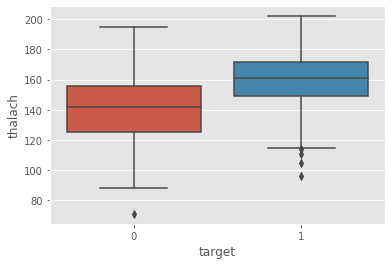

In [44]:
sns.boxplot(x=data_heart['target'], y=data_heart['thalach'])

**People with higher heart rate is tend to have disease more. Overall the median heart rate is more to the people who have heart.**

# Let's see chol feature.

chol: serum cholestoral in mg/dl

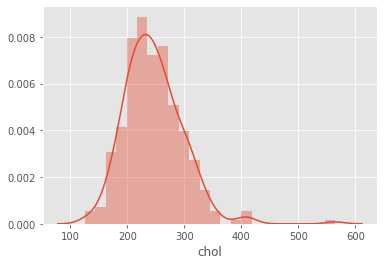

In [45]:
sns.distplot(data_heart['chol'])

**There seems an outlier around 550. Maybe it falls under the category who have heart disease.**

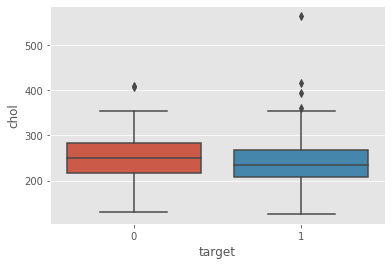

In [46]:
sns.boxplot(x=data_heart['target'], y=data_heart['chol'])

**Though the median chol is more for target 0 we can see very high values of chol in target 1. Outliers can be
good indicator.**

##  Multivariate analysis


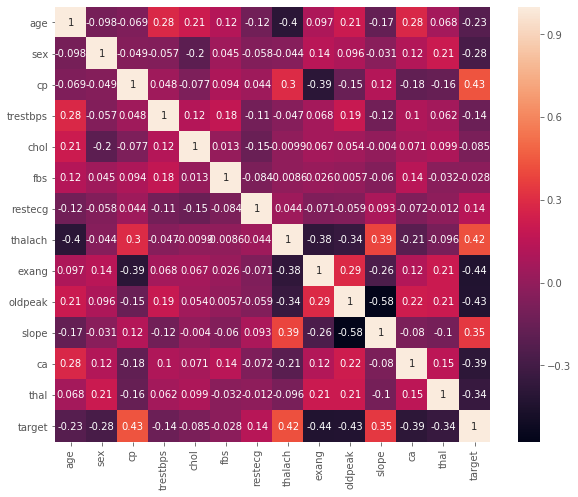

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(data_heart.corr(), square=True,annot=True);

In [48]:
def scatterplot(var1,var2,var3,var4):
    f,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    
    
    colors = ['darkturquoise','darkorange']
    ax1 = sns.scatterplot(x = data_heart[var1], y = data_heart[var2], hue = "target",
                        data = data_heart,  ax=ax1, palette=colors, alpha=0.8, edgecolor="white",linewidth=0.1)
    ax1.grid(b=True, which='major', color='lightgrey', linewidth=0.2)
    ax1.set_title(str(var1)+' '+'vs'+' '+str(var2)+' '+'vs target', fontsize=18)
    ax1.set_xlabel(str(var1), fontsize=12)
    ax1.set_ylabel(str(var2), fontsize=12)

    ax2 = sns.scatterplot(x = data_heart[var3], y = data_heart[var4], hue = "target",
                        data = data_heart,  ax=ax2, palette=colors, alpha=0.8, edgecolor="white",linewidth=0.1)
    ax2.grid(b=True, which='major', color='lightgrey', linewidth=0.2)
    ax2.set_title(str(var3)+' '+'vs'+' '+str(var4)+' '+'vs target', fontsize=18)
    ax2.set_xlabel(str(var1), fontsize=12)
    ax2.set_ylabel(str(var4), fontsize=12)

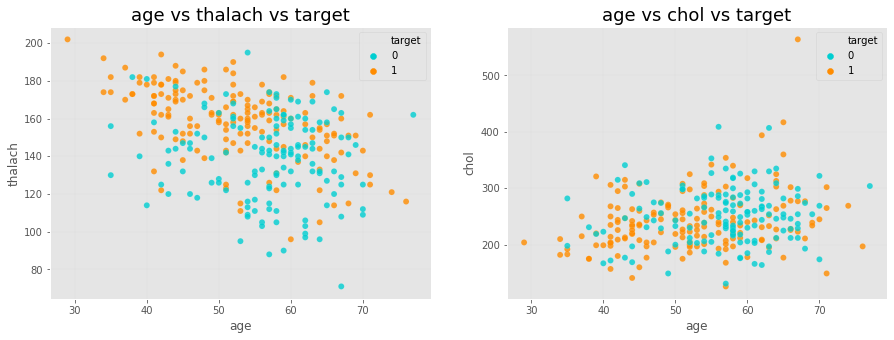

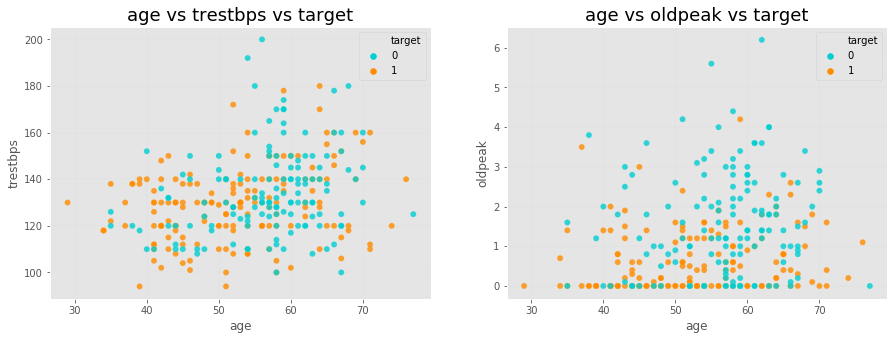

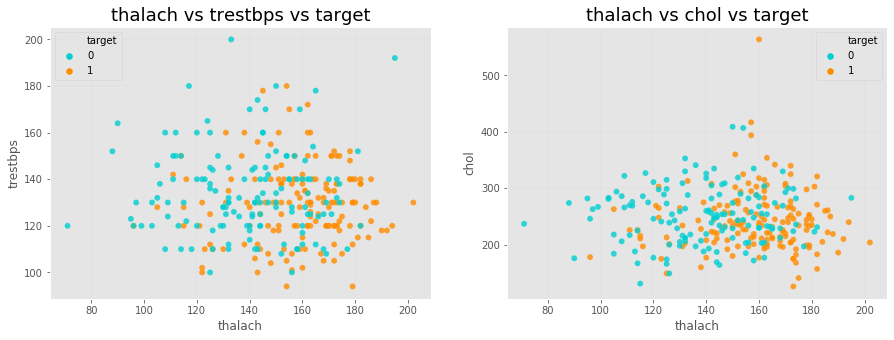

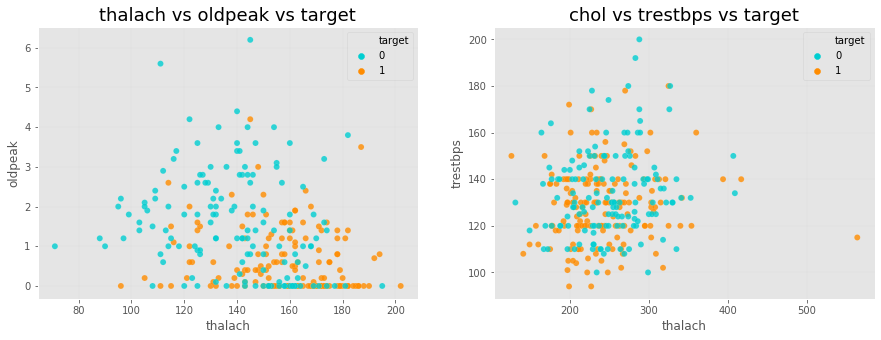

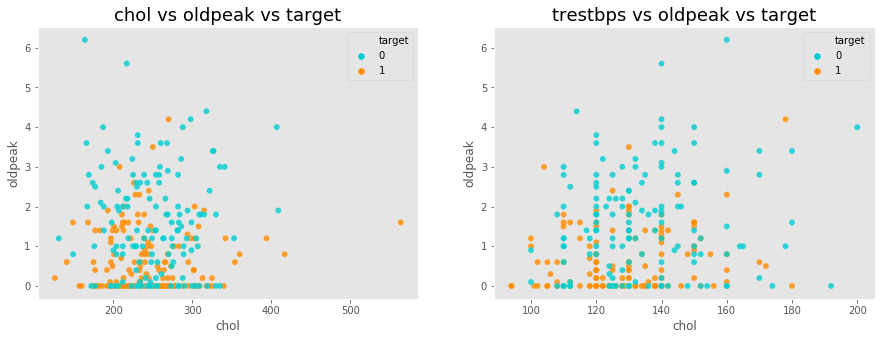

In [49]:
scatterplot('age','thalach','age', 'chol')
scatterplot('age','trestbps','age', 'oldpeak')
scatterplot('thalach','trestbps','thalach', 'chol')
scatterplot('thalach','oldpeak','chol', 'trestbps')
scatterplot('chol','oldpeak','trestbps', 'oldpeak')

Range: [71, 202]
Mode is: 162
# of people with thalach level > 150 and having Heart Disease :- 120
# of people with thalach level > 150 and having no Heart Disease :- 44


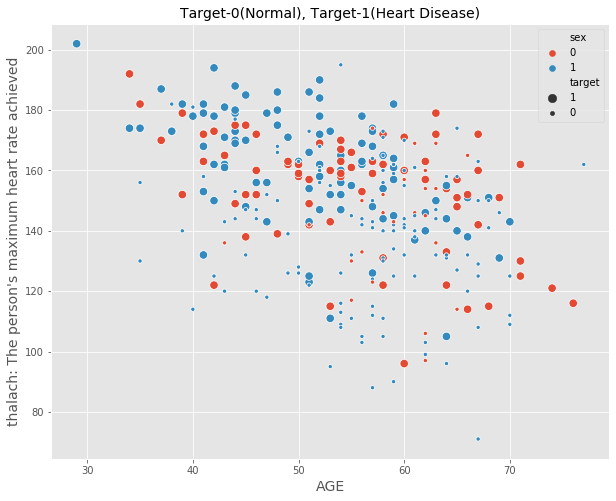

In [50]:
print("Range: [{}, {}]".format(data_heart.thalach.min(), \
      data_heart.thalach.max()))
print("Mode is:", data_heart.thalach.mode()[0])
print("# of people with thalach level > 150 and having Heart Disease :-",
      len(data_heart[(data_heart.thalach > 150) & (data_heart.target==1) ]))

print("# of people with thalach level > 150 and having no Heart Disease :-", 
      len(data_heart[(data_heart.thalach > 150) & (data_heart.target==0) ]))

plt.figure(figsize=(10,8))
g=sns.scatterplot(data_heart["age"],data_heart["thalach"],hue=data_heart["sex"]
                  ,size=data_heart["target"],size_order=[1,0],s=400)
plt.title("Target-0(Normal), Target-1(Heart Disease)",fontsize=14)
plt.xlabel("AGE",fontsize=14)
plt.ylabel("thalach: The person's maximum heart rate achieved",fontsize=14)
plt.grid(True)
plt.show()

### Person having Thalach level >150 having 75% chances of Heart Disease.
### For Age below 50, Females have high Chances of Heart Disease for Cholesterol level > 120.
### Person who having heart disease and thalach level>150 is of all range of age.

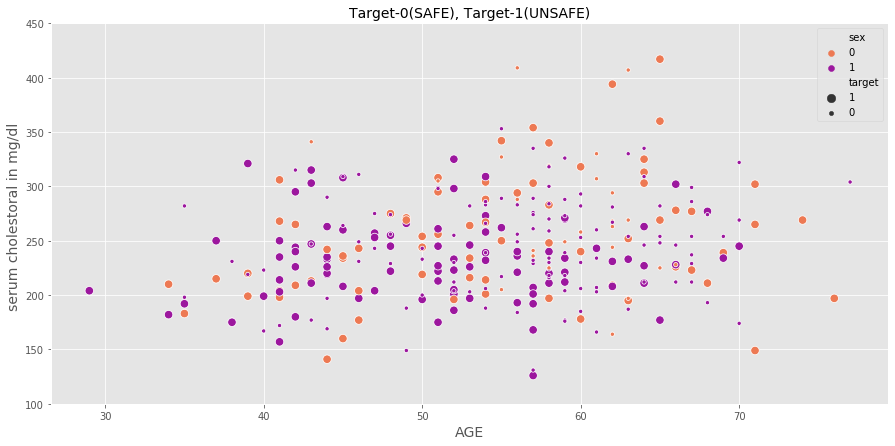

In [51]:
plt.figure(figsize=(15, 7))
g=sns.scatterplot(data_heart["age"],data_heart["chol"],hue=data_heart["sex"],size=data_heart["target"],palette="plasma_r",size_order=[1,0],s=800)
plt.title("Target-0(SAFE), Target-1(UNSAFE)",fontsize=14)
plt.xlabel("AGE",fontsize=14)
plt.ylabel("serum cholestoral in mg/dl ",fontsize=14)
plt.ylim([100,450])
plt.grid(True)
plt.show()

### Inferences
* For Age below 50, Females have high Chances of Heart Disease even for Cholesterol level below 190.
* For Age above 70, Females are assured to have a Heart Disease where as Males assured not to have it.
* Men must maintain their health after 40
* **Therefore, The Data are contradicting the statement of health.org (Given in the description stage) that Men have a greater risk of heart attack than women do, and men have attacks earlier in life.**

## Changing the data type and Creating the dummies

In [99]:
data_heart['sex'] = data_heart.sex.astype("object", errors = "raise")
data_heart['cp'] = data_heart.cp.astype("object", errors = "raise")
data_heart['fbs'] = data_heart.fbs.astype("object", errors = "raise")
data_heart['restecg'] = data_heart.restecg.astype("object", errors = "raise")
data_heart['exang'] = data_heart.exang.astype("object", errors = "raise")
data_heart['thal'] = data_heart.thal.astype("object", errors = "raise")
data_heart['target'] = data_heart.target.astype("object", errors = "raise")
data_heart['slope'] = data_heart.slope.astype("object", errors = "raise")

## Since, we have to buld a logistic regression model, there must not be any multicollinearity
* **And we'll check the Chisquare for qualitative features**

## Hypothesis Testing

In [100]:
#Contingency Table : Sex vs Target
contingency_table = pd.crosstab(data_heart["sex"], data_heart["cp"])
print('contingency_table :-\n', contingency_table)

contingency_table :-
 cp     0   1   2   3
sex                 
0     39  18  35   4
1    104  32  52  19


In [101]:
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n", Observed_Values)

Observed Values :-
 [[ 39  18  35   4]
 [104  32  52  19]]


In [102]:
#Expected Values
import scipy.stats
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[45.30693069 15.84158416 27.56435644  7.28712871]
 [97.69306931 34.15841584 59.43564356 15.71287129]]


In [103]:
#Degree of Freedom
print("Degree of Freedom:", b[2])

Degree of Freedom: 3


In [104]:
#Significance Level 1%
alpha=0.01

In [105]:
#chi-square statistic - χ2
print("chi-square statistic:", b[0])

chi-square statistic: 6.822075813213287


In [106]:
print('p-value:', np.round(b[1], 7))

p-value: 0.0777903


In [107]:
from scipy.stats import chi2

critical_value = chi2.ppf(q = 1-alpha, df = b[2])
print('critical_value:',critical_value)

critical_value: 11.344866730144373


In [108]:
print('Significance level: ', alpha)
print('Degree of Freedom: ', b[2])
print('chi-square statistic:', b[0])
print('critical_value:',critical_value)
print('p-value:', b[1])

Significance level:  0.01
Degree of Freedom:  3
chi-square statistic: 6.822075813213287
critical_value: 11.344866730144373
p-value: 0.07779031388551413


In [109]:
ho = "There is a relationship between 2 categorical variables"

In [110]:
ha = "There is no relationship between 2 categorical variables"

In [111]:
# Hypothesis test
if b[0] >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if b[1] <=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [112]:
#Contingency Table : Sex vs fbs

contingency_table = pd.crosstab(data_heart["sex"], data_heart["fbs"])
print('contingency_table :-\n', contingency_table, end = "\n\n\n")

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n", Observed_Values, end = "\n\n\n")

#Expected Values
import scipy.stats
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values, end = "\n\n\n")

# critical_value
critical_value = scipy.stats.chi2.ppf(q = 1-alpha, df = b[2])

print('Significance level: ', alpha)
print('Degree of Freedom: ', b[2])
print('chi-square statistic:', b[0])
print('critical_value:',critical_value)
print('p-value:', b[1], end = "\n\n\n")

# Hypothesis test
if b[0] >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if b[1] <=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 fbs    0   1
sex         
0     84  12
1    174  33


Observed Values :-
 [[ 84  12]
 [174  33]]


Expected Values :-
 [[ 81.74257426  14.25742574]
 [176.25742574  30.74257426]]


Significance level:  0.01
Degree of Freedom:  1
chi-square statistic: 0.37239861274950387
critical_value: 6.6348966010212145
p-value: 0.5416997129593022


Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [113]:
#Contingency Table : Sex vs restecg

contingency_table = pd.crosstab(data_heart["sex"], data_heart["restecg"])
print('contingency_table :-\n', contingency_table, end = "\n\n\n")

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n", Observed_Values, end = "\n\n\n")

#Expected Values
import scipy.stats
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values, end = "\n\n\n")

# critical_value
critical_value = scipy.stats.chi2.ppf(q = 1-alpha, df = b[2])

print('Significance level: ', alpha)
print('Degree of Freedom: ', b[2])
print('chi-square statistic:', b[0])
print('critical_value:',critical_value)
print('p-value:', b[1], end = "\n\n\n")

# Hypothesis test
if b[0] >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if b[1] <=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 restecg    0    1  2
sex                 
0         44   49  3
1        103  103  1


Observed Values :-
 [[ 44  49   3]
 [103 103   1]]


Expected Values :-
 [[ 46.57425743  48.15841584   1.26732673]
 [100.42574257 103.84158416   2.73267327]]


Significance level:  0.01
Degree of Freedom:  2
chi-square statistic: 3.697303822606464
critical_value: 9.21034037197618
p-value: 0.1574492789014144


Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [114]:
#Contingency Table : Sex vs slope

contingency_table = pd.crosstab(data_heart["sex"], data_heart["slope"])
print('contingency_table :-\n', contingency_table, end = "\n\n\n")

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n", Observed_Values, end = "\n\n\n")

#Expected Values
import scipy.stats
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values, end = "\n\n\n")

# critical_value
critical_value = scipy.stats.chi2.ppf(q = 1-alpha, df = b[2])

print('Significance level: ', alpha)
print('Degree of Freedom: ', b[2])
print('chi-square statistic:', b[0])
print('critical_value:',critical_value)
print('p-value:', b[1], end = "\n\n\n")

# Hypothesis test
if b[0] >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if b[1] <=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 slope   0   1   2
sex              
0       5  45  46
1      16  95  96


Observed Values :-
 [[ 5 45 46]
 [16 95 96]]


Expected Values :-
 [[ 6.65346535 44.35643564 44.99009901]
 [14.34653465 95.64356436 97.00990099]]


Significance level:  0.01
Degree of Freedom:  2
chi-square statistic: 0.6483214656295262
critical_value: 9.21034037197618
p-value: 0.7231340016747048


Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [68]:
#Contingency Table : Sex vs exang

contingency_table = pd.crosstab(data_heart["sex"], data_heart["exang"])
print('contingency_table :-\n', contingency_table, end = "\n\n\n")

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n", Observed_Values, end = "\n\n\n")

#Expected Values
import scipy.stats
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values, end = "\n\n\n")

# critical_value
critical_value = scipy.stats.chi2.ppf(q = 1-alpha, df = b[2])

print('Significance level: ', alpha)
print('Degree of Freedom: ', b[2])
print('chi-square statistic:', b[0])
print('critical_value:',critical_value)
print('p-value:', b[1], end = "\n\n\n")

# Hypothesis test
if b[0] >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if b[1] <=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 exang    0   1
sex           
0       74  22
1      130  77


Observed Values :-
 [[ 74  22]
 [130  77]]


Expected Values :-
 [[ 64.63366337  31.36633663]
 [139.36633663  67.63366337]]


Significance level:  0.01
Degree of Freedom:  1
chi-square statistic: 5.44890677676703
critical_value: 6.6348966010212145
p-value: 0.019580575936741618


Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


## "sex" passes our statistical significance tests, thus will be included in our model

In [69]:
#Contingency Table : cp vs fbs

contingency_table = pd.crosstab(data_heart["cp"], data_heart["fbs"])
print('contingency_table :-\n', contingency_table, end = "\n\n\n")

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n", Observed_Values, end = "\n\n\n")

#Expected Values
import scipy.stats
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values, end = "\n\n\n")

# critical_value
critical_value = scipy.stats.chi2.ppf(q = 1-alpha, df = b[2])

print('Significance level: ', alpha)
print('Degree of Freedom: ', b[2])
print('chi-square statistic:', b[0])
print('critical_value:',critical_value)
print('p-value:', b[1], end = "\n\n\n")

# Hypothesis test
if b[0] >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if b[1] <=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 fbs    0   1
cp          
0    125  18
1     45   5
2     70  17
3     18   5


Observed Values :-
 [[125  18]
 [ 45   5]
 [ 70  17]
 [ 18   5]]


Expected Values :-
 [[121.76237624  21.23762376]
 [ 42.57425743   7.42574257]
 [ 74.07920792  12.92079208]
 [ 19.58415842   3.41584158]]


Significance level:  0.01
Degree of Freedom:  3
chi-square statistic: 3.8855652579738207
critical_value: 11.344866730144373
p-value: 0.2740891008647542


Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [70]:
#Contingency Table : cp vs restecg

contingency_table = pd.crosstab(data_heart["cp"], data_heart["restecg"])
print('contingency_table :-\n', contingency_table, end = "\n\n\n")

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n", Observed_Values, end = "\n\n\n")

#Expected Values
import scipy.stats
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values, end = "\n\n\n")

# critical_value
critical_value = scipy.stats.chi2.ppf(q = 1-alpha, df = b[2])

print('Significance level: ', alpha)
print('Degree of Freedom: ', b[2])
print('chi-square statistic:', b[0])
print('critical_value:',critical_value)
print('p-value:', b[1], end = "\n\n\n")

# Hypothesis test
if b[0] >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if b[1] <=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 restecg   0   1  2
cp                
0        78  62  3
1        19  31  0
2        36  50  1
3        14   9  0


Observed Values :-
 [[78 62  3]
 [19 31  0]
 [36 50  1]
 [14  9  0]]


Expected Values :-
 [[69.37623762 71.7359736   1.88778878]
 [24.25742574 25.08250825  0.66006601]
 [42.20792079 43.64356436  1.14851485]
 [11.15841584 11.5379538   0.30363036]]


Significance level:  0.01
Degree of Freedom:  6
chi-square statistic: 9.687764454239042
critical_value: 16.811893829770927
p-value: 0.13843180006431838


Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [71]:
#Contingency Table : Sex vs exang

contingency_table = pd.crosstab(data_heart["sex"], data_heart["exang"])
print('contingency_table :-\n', contingency_table, end = "\n\n\n")

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n", Observed_Values, end = "\n\n\n")

#Expected Values
import scipy.stats
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values, end = "\n\n\n")

# critical_value
critical_value = scipy.stats.chi2.ppf(q = 1-alpha, df = b[2])

print('Significance level: ', alpha)
print('Degree of Freedom: ', b[2])
print('chi-square statistic:', b[0])
print('critical_value:',critical_value)
print('p-value:', b[1], end = "\n\n\n")

# Hypothesis test
if b[0] >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if b[1] <=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 exang    0   1
sex           
0       74  22
1      130  77


Observed Values :-
 [[ 74  22]
 [130  77]]


Expected Values :-
 [[ 64.63366337  31.36633663]
 [139.36633663  67.63366337]]


Significance level:  0.01
Degree of Freedom:  1
chi-square statistic: 5.44890677676703
critical_value: 6.6348966010212145
p-value: 0.019580575936741618


Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [72]:
#Contingency Table : Sex vs thal

contingency_table = pd.crosstab(data_heart["sex"], data_heart["thal"])
print('contingency_table :-\n', contingency_table, end = "\n\n\n")

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n", Observed_Values, end = "\n\n\n")

#Expected Values
import scipy.stats
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values, end = "\n\n\n")

# critical_value
critical_value = scipy.stats.chi2.ppf(q = 1-alpha, df = b[2])

print('Significance level: ', alpha)
print('Degree of Freedom: ', b[2])
print('chi-square statistic:', b[0])
print('critical_value:',critical_value)
print('p-value:', b[1], end = "\n\n\n")

# Hypothesis test
if b[0] >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if b[1] <=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 thal  0   1   2    3
sex                 
0     1   1  79   15
1     1  17  87  102


Observed Values :-
 [[  1   1  79  15]
 [  1  17  87 102]]


Expected Values :-
 [[  0.63366337   5.7029703   52.59405941  37.06930693]
 [  1.36633663  12.2970297  113.40594059  79.93069307]]


Significance level:  0.01
Degree of Freedom:  3
chi-square statistic: 44.62557012236982
critical_value: 11.344866730144373
p-value: 1.1113136426042769e-09


Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [73]:
#Contingency Table : Sex vs slope

contingency_table = pd.crosstab(data_heart["sex"], data_heart["slope"])
print('contingency_table :-\n', contingency_table, end = "\n\n\n")

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n", Observed_Values, end = "\n\n\n")

#Expected Values
import scipy.stats
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values, end = "\n\n\n")

# critical_value
critical_value = scipy.stats.chi2.ppf(q = 1-alpha, df = b[2])

print('Significance level: ', alpha)
print('Degree of Freedom: ', b[2])
print('chi-square statistic:', b[0])
print('critical_value:',critical_value)
print('p-value:', b[1], end = "\n\n\n")

# Hypothesis test
if b[0] >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if b[1] <=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 slope   0   1   2
sex              
0       5  45  46
1      16  95  96


Observed Values :-
 [[ 5 45 46]
 [16 95 96]]


Expected Values :-
 [[ 6.65346535 44.35643564 44.99009901]
 [14.34653465 95.64356436 97.00990099]]


Significance level:  0.01
Degree of Freedom:  2
chi-square statistic: 0.6483214656295262
critical_value: 9.21034037197618
p-value: 0.7231340016747048


Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


## "cp" passes our statistical significance tests, thus will be included in our model

In [74]:
#Contingency Table : fbs vs restecg

contingency_table = pd.crosstab(data_heart["restecg"], data_heart["fbs"])
print('contingency_table :-\n', contingency_table, end = "\n\n\n")

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n", Observed_Values, end = "\n\n\n")

#Expected Values
import scipy.stats
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values, end = "\n\n\n")

# critical_value
critical_value = scipy.stats.chi2.ppf(q = 1-alpha, df = b[2])

print('Significance level: ', alpha)
print('Degree of Freedom: ', b[2])
print('chi-square statistic:', b[0])
print('critical_value:',critical_value)
print('p-value:', b[1], end = "\n\n\n")

# Hypothesis test
if b[0] >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if b[1] <=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 fbs        0   1
restecg         
0        121  26
1        133  19
2          4   0


Observed Values :-
 [[121  26]
 [133  19]
 [  4   0]]


Expected Values :-
 [[125.16831683  21.83168317]
 [129.42574257  22.57425743]
 [  3.40594059   0.59405941]]


Significance level:  0.01
Degree of Freedom:  2
chi-square statistic: 2.2969737119654066
critical_value: 9.21034037197618
p-value: 0.3171162490817322


Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [75]:
#Contingency Table : exang vs fbs

contingency_table = pd.crosstab(data_heart["exang"], data_heart["fbs"])
print('contingency_table :-\n', contingency_table, end = "\n\n\n")

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n", Observed_Values, end = "\n\n\n")

#Expected Values
import scipy.stats
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values, end = "\n\n\n")

# critical_value
critical_value = scipy.stats.chi2.ppf(q = 1-alpha, df = b[2])

print('Significance level: ', alpha)
print('Degree of Freedom: ', b[2])
print('chi-square statistic:', b[0])
print('critical_value:',critical_value)
print('p-value:', b[1], end = "\n\n\n")

# Hypothesis test
if b[0] >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if b[1] <=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 fbs      0   1
exang         
0      175  29
1       83  16


Observed Values :-
 [[175  29]
 [ 83  16]]


Expected Values :-
 [[173.7029703  30.2970297]
 [ 84.2970297  14.7029703]]


Significance level:  0.01
Degree of Freedom:  1
chi-square statistic: 0.07536666827877478
critical_value: 6.6348966010212145
p-value: 0.7836774258510979


Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [76]:
#Contingency Table : slope vs fbs

contingency_table = pd.crosstab(data_heart["slope"], data_heart["fbs"])
print('contingency_table :-\n', contingency_table, end = "\n\n\n")

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n", Observed_Values, end = "\n\n\n")

#Expected Values
import scipy.stats
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values, end = "\n\n\n")

# critical_value
critical_value = scipy.stats.chi2.ppf(q = 1-alpha, df = b[2])

print('Significance level: ', alpha)
print('Degree of Freedom: ', b[2])
print('chi-square statistic:', b[0])
print('critical_value:',critical_value)
print('p-value:', b[1], end = "\n\n\n")

# Hypothesis test
if b[0] >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if b[1] <=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 fbs      0   1
slope         
0       15   6
1      121  19
2      122  20


Observed Values :-
 [[ 15   6]
 [121  19]
 [122  20]]


Expected Values :-
 [[ 17.88118812   3.11881188]
 [119.20792079  20.79207921]
 [120.91089109  21.08910891]]


Significance level:  0.01
Degree of Freedom:  2
chi-square statistic: 3.373369753404145
critical_value: 9.21034037197618
p-value: 0.18513224402597767


Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [77]:
#Contingency Table : thal vs fbs

contingency_table = pd.crosstab(data_heart["thal"], data_heart["fbs"])
print('contingency_table :-\n', contingency_table, end = "\n\n\n")

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n", Observed_Values, end = "\n\n\n")

#Expected Values
import scipy.stats
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values, end = "\n\n\n")

# critical_value
critical_value = scipy.stats.chi2.ppf(q = 1-alpha, df = b[2])

print('Significance level: ', alpha)
print('Degree of Freedom: ', b[2])
print('chi-square statistic:', b[0])
print('critical_value:',critical_value)
print('p-value:', b[1], end = "\n\n\n")

# Hypothesis test
if b[0] >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if b[1] <=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 fbs     0   1
thal         
0       1   1
1      13   5
2     146  20
3      98  19


Observed Values :-
 [[  1   1]
 [ 13   5]
 [146  20]
 [ 98  19]]


Expected Values :-
 [[  1.7029703    0.2970297 ]
 [ 15.32673267   2.67326733]
 [141.34653465  24.65346535]
 [ 99.62376238  17.37623762]]


Significance level:  0.01
Degree of Freedom:  3
chi-square statistic: 5.5419835573660166
critical_value: 11.344866730144373
p-value: 0.13614898890896338


Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


## "fbs" passes our statistical significance tests, thus will be included in our model

In [78]:
#Contingency Table : exang vs restecg

contingency_table = pd.crosstab(data_heart["restecg"], data_heart["exang"])
print('contingency_table :-\n', contingency_table, end = "\n\n\n")

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n", Observed_Values, end = "\n\n\n")

#Expected Values
import scipy.stats
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values, end = "\n\n\n")

# critical_value
critical_value = scipy.stats.chi2.ppf(q = 1-alpha, df = b[2])

print('Significance level: ', alpha)
print('Degree of Freedom: ', b[2])
print('chi-square statistic:', b[0])
print('critical_value:',critical_value)
print('p-value:', b[1], end = "\n\n\n")

# Hypothesis test
if b[0] >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if b[1] <=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 exang      0   1
restecg         
0         93  54
1        109  43
2          2   2


Observed Values :-
 [[ 93  54]
 [109  43]
 [  2   2]]


Expected Values :-
 [[ 98.97029703  48.02970297]
 [102.33663366  49.66336634]
 [  2.69306931   1.30693069]]


Significance level:  0.01
Degree of Freedom:  2
chi-square statistic: 2.976081401460106
critical_value: 9.21034037197618
p-value: 0.225814660887882


Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [79]:
#Contingency Table : slope vs restecg

contingency_table = pd.crosstab(data_heart["restecg"], data_heart["slope"])
print('contingency_table :-\n', contingency_table, end = "\n\n\n")

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n", Observed_Values, end = "\n\n\n")

#Expected Values
import scipy.stats
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values, end = "\n\n\n")

# critical_value
critical_value = scipy.stats.chi2.ppf(q = 1-alpha, df = b[2])

print('Significance level: ', alpha)
print('Degree of Freedom: ', b[2])
print('chi-square statistic:', b[0])
print('critical_value:',critical_value)
print('p-value:', b[1], end = "\n\n\n")

# Hypothesis test
if b[0] >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if b[1] <=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 slope     0   1   2
restecg            
0        12  76  59
1         8  61  83
2         1   3   0


Observed Values :-
 [[12 76 59]
 [ 8 61 83]
 [ 1  3  0]]


Expected Values :-
 [[10.18811881 67.92079208 68.89108911]
 [10.53465347 70.2310231  71.23432343]
 [ 0.27722772  1.84818482  1.87458746]]


Significance level:  0.01
Degree of Freedom:  4
chi-square statistic: 10.94663027844835
critical_value: 13.276704135987622
p-value: 0.02717040972360118


Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [80]:
#Contingency Table : thal vs restecg

contingency_table = pd.crosstab(data_heart["restecg"], data_heart["thal"])
print('contingency_table :-\n', contingency_table, end = "\n\n\n")

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n", Observed_Values, end = "\n\n\n")

#Expected Values
import scipy.stats
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values, end = "\n\n\n")

# critical_value
critical_value = scipy.stats.chi2.ppf(q = 1-alpha, df = b[2])

print('Significance level: ', alpha)
print('Degree of Freedom: ', b[2])
print('chi-square statistic:', b[0])
print('critical_value:',critical_value)
print('p-value:', b[1], end = "\n\n\n")

# Hypothesis test
if b[0] >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if b[1] <=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 thal     0   1   2   3
restecg               
0        1  10  78  58
1        1   7  86  58
2        0   1   2   1


Observed Values :-
 [[ 1 10 78 58]
 [ 1  7 86 58]
 [ 0  1  2  1]]


Expected Values :-
 [[9.70297030e-01 8.73267327e+00 8.05346535e+01 5.67623762e+01]
 [1.00330033e+00 9.02970297e+00 8.32739274e+01 5.86930693e+01]
 [2.64026403e-02 2.37623762e-01 2.19141914e+00 1.54455446e+00]]


Significance level:  0.01
Degree of Freedom:  6
chi-square statistic: 3.52633171701928
critical_value: 16.811893829770927
p-value: 0.740463143607372


Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


## "restecg" passes our statistical significance tests, thus will be included in our model

## "exang and thal"  does not pass our statistical significance tests, thus will not be included in our model

## Creating Dummies

In [115]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null object
cp          303 non-null object
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null object
restecg     303 non-null object
thalach     303 non-null int64
exang       303 non-null object
oldpeak     303 non-null float64
slope       303 non-null object
ca          303 non-null int64
thal        303 non-null object
target      303 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 33.2+ KB


In [116]:
data_heart['target'] = data_heart.target.astype("int64", errors = "raise")

In [117]:
data_heart_dummies = pd.get_dummies(data_heart, drop_first = True)

In [118]:
data_heart_dummies.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target',
       'sex_1', 'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2',
       'exang_1', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [119]:
!pip install imblearn

In [120]:
from imblearn.over_sampling import SMOTE

## Resampling

In [121]:
sm2 = SMOTE(random_state=2)

In [122]:
array1, array2 = sm2.fit_sample(data_heart_dummies.drop("target", axis = 1), \
              data_heart_dummies.pop("target"))

In [123]:
data_heart_dummies.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1',
       'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [124]:
pd.DataFrame(array1).shape

(330, 19)

In [125]:
data_heart_dummies1 = pd.DataFrame(array1, columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1',
       'slope_2', 'thal_1', 'thal_2', 'thal_3'])

In [126]:
data_heart_dummies2 = pd.DataFrame(array2, columns = ["target"])

In [127]:
data_heart_dummies = pd.concat([data_heart_dummies1, data_heart_dummies2], axis = 1)
del data_heart_dummies1, data_heart_dummies2

In [128]:
data_heart_dummies.shape

(330, 20)

In [129]:
len(data_heart_dummies)

330

## Standard Scaling

In [130]:
sc = StandardScaler()

In [131]:
data_heart_dummies_features_lis = data_heart_dummies.columns
X_std = sc.fit_transform(data_heart_dummies.drop("target", axis = 1))

In [132]:
y = array2.reshape(-1,)

# Model Building

In [133]:
# Logistic
lr_model = LogisticRegression(random_state=42, solver="lbfgs")

#  Fully grown decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

# Boostrap Sampled Random Forest : with the hope of controlling 
# the bias errors and variance errors
from sklearn.ensemble import RandomForestClassifier #for the model
rf_model_without_best_params = RandomForestClassifier(criterion = 'entropy', \
                                                      random_state=42 )

In [134]:
rf_param_grid = {
                 'max_depth' : [4, 6, 8,10],
                 'n_estimators': range(1,52),
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10,20],
                 'min_samples_leaf': [1, 3, 10,18],
                 'bootstrap': [True, False],
                 }

In [137]:
m_r = RandomizedSearchCV(param_distributions=rf_param_grid, 
                                    estimator = rf_model_without_best_params, scoring = "f1_weighted", 
                                    verbose = 1, n_iter = 100, cv = 3, random_state=42)

In [138]:
m_r.fit(X_std, y.reshape(-1,))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   11.8s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=N

In [139]:
#  Getting the best params for random forest
m_r.best_params_

{'n_estimators': 38,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

In [140]:
best_params_ = list(m_r.best_params_.values())

In [141]:
# Boostrap Sampled Random Forest : with the hope of controlling the bias errors and variance errors
rf_model = RandomForestClassifier(criterion = 'entropy', random_state=42, n_estimators=best_params_[0], \
                                  min_samples_split= best_params_[1], min_samples_leaf= best_params_[2]\
                                 , max_features= best_params_[3], max_depth=best_params_[4],\
                                 bootstrap=best_params_[5])

In [143]:
bg_model = BaggingClassifier(base_estimator=dt_model, n_estimators=51, random_state=42)
boost_model_bg = AdaBoostClassifier(base_estimator=bg_model, n_estimators=51, random_state=42,\
                                   learning_rate = 0.1)
boost_model_rf = AdaBoostClassifier(base_estimator=rf_model, n_estimators=51, random_state=42,\
                                   learning_rate = 0.1)
# boost_grad = GradientBoostingClassifier(verbose = 0, random_state= 42, n_estimators= 100, \
#                                        learning_rate = 0.1)
nb_model = GaussianNB()

In [144]:
# from sklearn.svm import SVC
# clf = SVC(gamma='auto')

In [145]:
voting_model = VotingClassifier(estimators= [('ADA_BAG', \
boost_model_bg), ('ADA_RF', boost_model_rf), ('Naive Bayes', nb_model)])

In [146]:
# boost_grad.fit(X_std, y)
# plt.figure(figsize=(15,15))
# plt.bar(range(len(boost_grad.feature_importances_)), boost_grad.feature_importances_)
# plt.title("Feature Importance")
# plt.xticks(np.arange(len(list(data_heart_dummies.columns))), data_heart_dummies.columns, rotation = 90)
# plt.grid(True)
# plt.show()

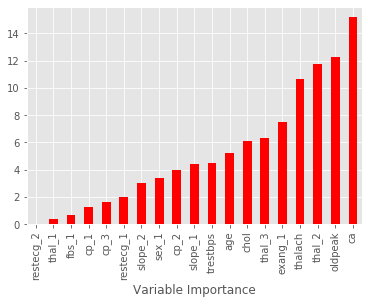

In [152]:
rf_model.fit(X_std, y)
importance = pd.DataFrame({'Importance':rf_model.feature_importances_*100}, index = (data_heart_dummies.drop("target", axis = 1)).columns)
importance.sort_values('Importance', axis=0, ascending=True).plot(kind='bar', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [153]:
data_heart_dummies.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1',
       'slope_2', 'thal_1', 'thal_2', 'thal_3', 'target'],
      dtype='object')

## Removing restecg2

In [154]:
X_std = X_std[:, [0,1,2,3,4,5,6,7,8,9,10, 11, 13, 14, 15, 16, 17, 18]] 

In [155]:
models = []
models.append(('Logistic', lr_model))
models.append(('DecisionTree', dt_model))
models.append(('RandomForest', rf_model))
models.append(('Bagging', bg_model))
models.append(('ADA Boost Bag', boost_model_bg))
models.append(('ADA Boost RF', boost_model_rf))
models.append(('Naive Baye\'s', nb_model))
models.append(('voting', voting_model))
# models.append(('Grad', boost_grad))
# models.append(('SVC', clf))

# perform k-fold on all the models

In [156]:
#  Evaluate each model in turn
results = []
names = []
scoring = 'f1_weighted'

for name, model in models :
    kfold = ms.KFold(n_splits= 3)
    cv_results = ms.cross_val_score(model, X_std, y, \
                                    scoring = scoring, cv = kfold)
    names.append(name)
    results.append(cv_results)
    msg = "(%s) ----  %s: %f +/- %f" % ('Error Score', name, 1 - np.mean(cv_results), cv_results.var())
    print(msg)
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-sco

(Error Score) ----  Logistic: 0.229447 +/- 0.002159
(Error Score) ----  DecisionTree: 0.304472 +/- 0.000171


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(Error Score) ----  RandomForest: 0.258514 +/- 0.004746


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(Error Score) ----  Bagging: 0.237686 +/- 0.001305


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(Error Score) ----  ADA Boost Bag: 0.236433 +/- 0.002087


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(Error Score) ----  ADA Boost RF: 0.256310 +/- 0.003570
(Error Score) ----  Naive Baye's: 0.153918 +/- 0.002437


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(Error Score) ----  voting: 0.241258 +/- 0.002421


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [158]:
pd.DataFrame(data = results, index = "Logistic, DT, RF, Bagging, Ada_Bag, \
Ada_Rf, NB, Voting".split(', ')).T

,Logistic,DT,RF,Bagging,Ada_Bag,Ada_Rf,NB,Voting
0,0.713450,0.713450,0.713450,0.757062,0.742857,0.713450,0.791209,0.713450
1,0.827258,0.690500,0.836310,0.808949,0.826915,0.827144,0.836147,0.827144
2,0.770950,0.682635,0.674699,0.720930,0.720930,0.690476,0.910891,0.735632


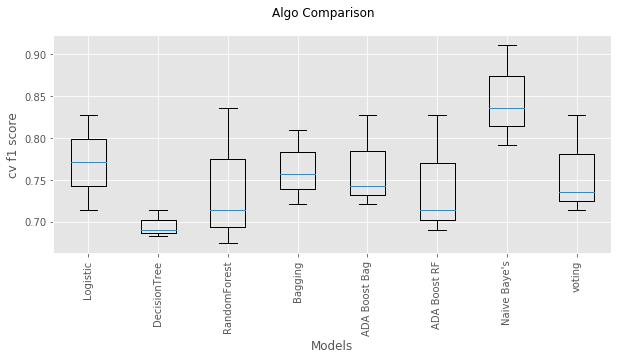

In [159]:
# Boxplot algo comparison
fig = plt.figure(figsize = (10, 4))
fig.suptitle("Algo Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel("cv f1 score")
plt.xlabel("Models")
ax.set_xticklabels(names)
plt.xticks(rotation = 90)
plt.show()

## Of all the models Naive Bayes is performing the best